# Diabetes Prediction

# Binary Classification Problem

# Target Variables

## 1: Diabetes , 0: No Diabetes

# Importing Essential Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
import warnings

C:\Users\usama\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.25.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Importing The Dataset

In [2]:
df = pd.read_csv("diabetes.csv")

### verifying it is a "dataframe" object in pandas

In [3]:
type(df)

pandas.core.frame.DataFrame

# Exploratory Data Analysis

In [4]:
#shape of the dataset
df.shape

(768, 9)

## Feature of the dataset i.e Columns of Dataset

In [5]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

## Preview the dataset to understand the data

#### printing out first 5 rows of dataset

In [6]:
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


#### Gerenrate 5 sample rows or column

In [7]:
df.sample(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
672,10,68,106,23,49,35.5,0.285,47,0
718,1,108,60,46,178,35.5,0.415,24,0
255,1,113,64,35,0,33.6,0.543,21,1
43,9,171,110,24,240,45.4,0.721,54,1
316,3,99,80,11,64,19.3,0.284,30,0


##### Checking Null Values

In [8]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

#### our feature of interest is target Variables

In [9]:
print("Total No Of Diseases")
print(len(df.Outcome.unique()))

Total No Of Diseases
2


In [10]:
#looking at unique values
df["Outcome"].unique()
# 1 for diabetes
# 0 for no diabetes

array([1, 0], dtype=int64)

In [11]:
# frequency distribution of target variable
# number of instances (rows) that belong to each class
df.groupby("Outcome").size()

Outcome
0    500
1    268
dtype: int64

since target variable have two values i.e 0 or 1

so this is a classification problem

binary classification problem

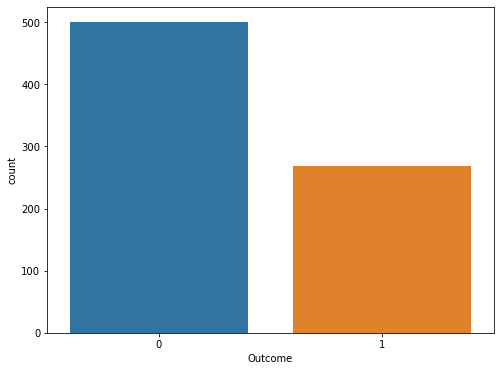

In [12]:
#visualizing the frequency distribution
f, ax = plt.subplots(figsize=(8,6))
ax = sns.countplot(x="Outcome", data=df)
plt.show()

# Discription

### Statistics of Dataset

In [13]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [14]:
#getting information about the attributes and thier datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


# Class Label or target variable

### analysing the target variable

In [15]:
df["Outcome"].describe()

count    768.000000
mean       0.348958
std        0.476951
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Outcome, dtype: float64

In [16]:
df["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [17]:
df.groupby("Outcome").mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


# interpretation of heatmap

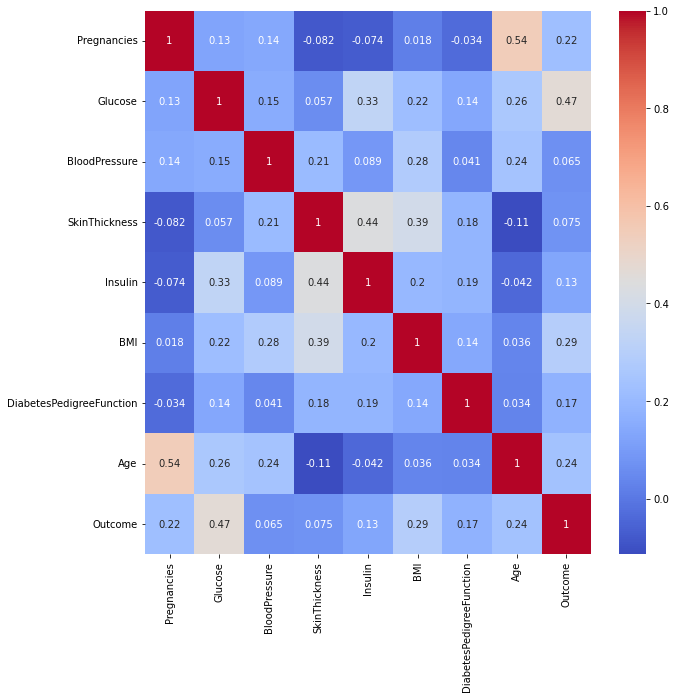

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a heatmap to show correlation between features
plt.figure(figsize=(10, 10))
sns.heatmap(df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']].corr(), annot=True, cmap='coolwarm')

plt.show()
   

0 --------> Non Diabetic
1 --------> Diabetic

# Seperating the features and Target variable

In [19]:
X = df.drop(columns="Outcome" , axis=1)
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [20]:
Y = df["Outcome"]
Y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

## We did this because their is difference in range of of features so it will become difficult for our machin learning model to predict to we will perform "Data Standardization"

# Data Standardization

In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


In [22]:
scaler.fit(X)

StandardScaler()

In [23]:
standardized_data = scaler.transform(X)
standardized_data

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

# So Now 

In [24]:
X = standardized_data
print(X)
Y = df["Outcome"]
print(Y)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]
0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


# Train Test Split

In [25]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X , Y , test_size=0.2,random_state=2, stratify=Y)

##### if we dont use stratify it is quite possible that all diabetic cases may go to X_train and All non diabetic cases go to X_test

In [26]:
X_train.shape

(614, 8)

In [27]:
X_test.shape

(154, 8)

In [28]:
Y_train.shape

(614,)

In [29]:
Y_test.shape

(154,)

## Summary of train test set

In [30]:
print("Shape Of X_train"+str(X_train.shape))
print("Shape Of Y_train"+str(Y_train.shape))
print("Shape Of X_test"+str(X_test.shape))
print("Shape Of Y_test"+str(Y_test.shape))

Shape Of X_train(614, 8)
Shape Of Y_train(614,)
Shape Of X_test(154, 8)
Shape Of Y_test(154,)


# Training The Model

# Logistic Regression

In [31]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve,auc
from sklearn.metrics import accuracy_score, recall_score , f1_score,precision_score
from sklearn.model_selection import train_test_split 

In [32]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train,Y_train)

Y_pred_lr = lr.predict(X_test)

In [33]:
Y_pred_lr.shape

(154,)

# To Check the accuracy

In [34]:
from sklearn.metrics import accuracy_score
import sklearn.metrics as metrics

In [35]:
score_lr = round(accuracy_score(Y_pred_lr,Y_test)*100,2)
print("The accuracy Score achieved using Logistic Regression is "+ str(score_lr)+"%")

The accuracy Score achieved using Logistic Regression is 75.97%


# Confusion matrix and classification report

In [36]:
print(metrics.confusion_matrix(Y_pred_lr,Y_test))
print(classification_report(Y_pred_lr,Y_test))

[[89 26]
 [11 28]]
              precision    recall  f1-score   support

           0       0.89      0.77      0.83       115
           1       0.52      0.72      0.60        39

    accuracy                           0.76       154
   macro avg       0.70      0.75      0.72       154
weighted avg       0.80      0.76      0.77       154



# Naive Bayes

In [37]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(X_train,Y_train)

Y_pred_nb = nb.predict(X_test)

In [38]:
Y_pred_nb.shape

(154,)

# Checking Accuracy Score

In [39]:
score_nb = round(accuracy_score(Y_pred_nb,Y_test)*100,2)
print("The accuracy Score achieved using Naive Bayes is "+ str(score_nb)+"%")

The accuracy Score achieved using Naive Bayes is 77.27%


# Confusion matrix and classification report

In [40]:
print(metrics.confusion_matrix(Y_pred_nb,Y_test))
print(classification_report(Y_pred_nb,Y_test))

[[88 23]
 [12 31]]
              precision    recall  f1-score   support

           0       0.88      0.79      0.83       111
           1       0.57      0.72      0.64        43

    accuracy                           0.77       154
   macro avg       0.73      0.76      0.74       154
weighted avg       0.79      0.77      0.78       154



# Support Vector Machine

In [41]:
from sklearn import svm

sv = svm.SVC(kernel='linear')

sv.fit(X_train,Y_train)

Y_pred_svm = sv.predict(X_test)

In [42]:
Y_pred_svm.shape

(154,)

# Checking Accuracy Score

In [43]:
score_svm = round(accuracy_score(Y_pred_svm,Y_test)*100,2)
print("The accuracy Score achieved using SVM is "+ str(score_svm)+"%")

The accuracy Score achieved using SVM is 77.27%


# Confusion matrix and classification report

In [44]:
print(metrics.confusion_matrix(Y_pred_nb,Y_test))
print(classification_report(Y_pred_nb,Y_test))

[[88 23]
 [12 31]]
              precision    recall  f1-score   support

           0       0.88      0.79      0.83       111
           1       0.57      0.72      0.64        43

    accuracy                           0.77       154
   macro avg       0.73      0.76      0.74       154
weighted avg       0.79      0.77      0.78       154



# K Nearest Neighbors

In [45]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)

knn.fit(X_train,Y_train)

Y_pred_knn = knn.predict(X_test)

In [46]:
Y_pred_knn.shape

(154,)

# Checking Accuracy Score

In [47]:
score_knn = round(accuracy_score(Y_pred_knn,Y_test)*100,2)
print("The accuracy Score achieved using K Nearest Neighbors is "+ str(score_knn)+"%")

The accuracy Score achieved using K Nearest Neighbors is 70.13%


# Confusion matrix and classification report

In [48]:
print(metrics.confusion_matrix(Y_pred_knn,Y_test))
print(classification_report(Y_pred_knn,Y_test))

[[87 33]
 [13 21]]
              precision    recall  f1-score   support

           0       0.87      0.72      0.79       120
           1       0.39      0.62      0.48        34

    accuracy                           0.70       154
   macro avg       0.63      0.67      0.63       154
weighted avg       0.76      0.70      0.72       154



# Random Forest

In [49]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

rf.fit(X_train,Y_train)

Y_pred_rf = rf.predict(X_test)

In [50]:
Y_pred_rf.shape

(154,)

# Checking Accuracy Score

In [51]:
score_rf = round(accuracy_score(Y_pred_rf,Y_test)*100,2)
print("The accuracy Score achieved using Random Forest is "+ str(score_rf)+"%")

The accuracy Score achieved using Random Forest is 74.03%


# Confusion matrix and classification report

In [52]:
print(metrics.confusion_matrix(Y_pred_rf,Y_test))
print(classification_report(Y_pred_rf,Y_test))

[[87 27]
 [13 27]]
              precision    recall  f1-score   support

           0       0.87      0.76      0.81       114
           1       0.50      0.68      0.57        40

    accuracy                           0.74       154
   macro avg       0.69      0.72      0.69       154
weighted avg       0.77      0.74      0.75       154



# Final Score

In [53]:
scores = [score_lr,score_nb,score_svm,score_knn,score_rf]

algorithms = ["Logistic Regression","Navie Bayes","Support Vector Machine","K Nearest Neighbors","Random Forest Tress"]

for i in range(len(algorithms)):
    print("The Accuracy Score Achieved Using "+algorithms[i]+" is: "+ str(scores[i])+" %")

The Accuracy Score Achieved Using Logistic Regression is: 75.97 %
The Accuracy Score Achieved Using Navie Bayes is: 77.27 %
The Accuracy Score Achieved Using Support Vector Machine is: 77.27 %
The Accuracy Score Achieved Using K Nearest Neighbors is: 70.13 %
The Accuracy Score Achieved Using Random Forest Tress is: 74.03 %


C:\Users\usama\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Algorithms', ylabel='Accuracy Score'>

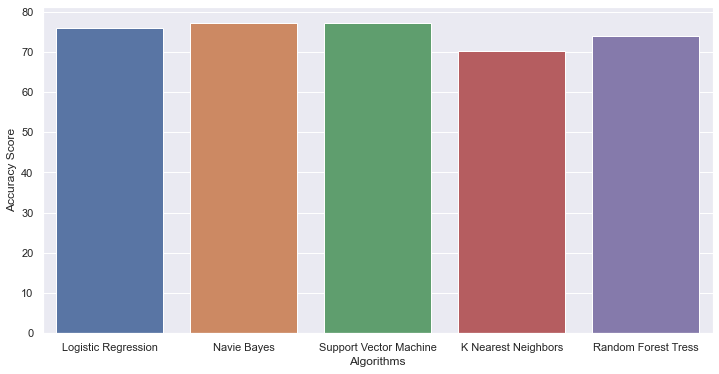

In [54]:
sns.set(rc={'figure.figsize':(12,6)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy Score")

sns.barplot(algorithms,scores)

# So From Above Comparision , it can be visualized that Support Vector Machine and Navie Bayes Gives the best Accuracy So I'm Gonna use Support Vector Machine

### accuracy on training data

In [55]:
X_train_prediction = sv.predict(X_train)
training_data_accuracy = round(accuracy_score(X_train_prediction,Y_train)*100,2)
print("The Accuracy on training Data is: "+str(training_data_accuracy)+" %")

The Accuracy on training Data is: 78.66 %


### accuracy on test data

In [56]:
X_test_prediction = sv.predict(X_test)
test_data_accuracy = round(accuracy_score(X_test_prediction,Y_test)*100,2)
print("The Accuracy on test Data is: "+str(test_data_accuracy)+" %")

The Accuracy on test Data is: 77.27 %


# Building A Predictive System

In [57]:
input_data = [4,110,92,0,0,37.6,0.191,30]

#change the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the numpy array as we are predicting for only one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

#standardize the input data
std_data = scaler.transform(input_data_reshaped)
print(std_data)

prediction = sv.predict(std_data)
print(prediction)

if (prediction[0]==0):
    print("The Person isn't Diabetic")
else:
    print("The Person is Diabetic")


[[ 0.04601433 -0.34096773  1.18359575 -1.28821221 -0.69289057  0.71168975
  -0.84827977 -0.27575966]]
[0]
The Person isn't Diabetic


C:\Users\usama\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [58]:
input_data = [8,183,64,0,0,23.3,0.672,32]

#change the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the numpy array as we are predicting for only one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

#standardize the input data
std_data = scaler.transform(input_data_reshaped)
print(std_data)

prediction = sv.predict(std_data)
print(prediction)

if (prediction[0]==0):
    print("The Person isn't Diabetic")
else:
    print("The Person is Diabetic")


[[ 1.23388019  1.94372388 -0.26394125 -1.28821221 -0.69289057 -1.10325546
   0.60439732 -0.10558415]]
[1]
The Person is Diabetic


C:\Users\usama\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [67]:
input_data = [1,85,66,29,0,26.6,0.351,31]

#change the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the numpy array as we are predicting for only one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

#standardize the input data
std_data = scaler.transform(input_data_reshaped)
print(std_data)

prediction = sv.predict(std_data)
print(prediction)

if (prediction[0]==0):
    print("The Person isn't Diabetic")
else:
    print("The Person is Diabetic")

[[-0.84488505 -1.12339636 -0.16054575  0.53090156 -0.69289057 -0.68442195
  -0.36506078 -0.19067191]]
[0]
The Person isn't Diabetic


C:\Users\usama\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


# Saving The Trained Model

In [59]:
import pickle

In [60]:
filename = 'diabetic_model.sav'
pickle.dump(sv , open(filename, 'wb'))

### Loading The save model

In [61]:
load_model = pickle.load(open('diabetic_model.sav','rb'))